# Option Strategy Example
Created: 2020-09-08

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import *

from src.analytics.signal import Signal
from src.analytics.performance import Statistics
from src.constant import *
from src.data import Option
from src.data.data_loader import Stock
from src.execution.performance import *
from src.execution.plotting import *
from src.execution.option_strategy import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from src.execution.performance import *
from src.execution.plotting import *
from src.utils.jupyter import display_dfs

## Option Daily Data Loader
Export your option data directory
```bash
EXPORT OPTION_DATA_DIR='path/to/your/dir'
```
Default path is `~/data`

In [8]:
ticker = 'SPY'

In [9]:
call = Option().daily(ticker=ticker, right=CALL)

In [10]:
put = Option().daily(ticker=ticker, right=PUT)

In [11]:
stock = Stock().daily(tickers=[ticker], diff=False)[ticker]

In [12]:
call

,date,expiration,strike,dte,delta,price,stock_price
0,2011-02-25,2011-02-25,124.0,0,1.000000,8.31,132.31
1,2011-02-25,2011-02-25,125.0,0,1.000000,7.31,132.31
2,2011-02-25,2011-02-25,126.0,0,1.000000,6.31,132.31
3,2011-02-25,2011-02-25,127.0,0,1.000000,5.31,132.31
4,2011-02-25,2011-02-25,128.0,0,1.000000,4.31,132.31
...,...,...,...,...,...,...,...
5218860,2020-06-19,2020-12-18,31.0,130,0.397654,1.38,29.63
5218861,2020-06-19,2020-12-18,32.0,130,0.311944,0.92,29.63
5218862,2020-06-19,2020-12-18,33.0,130,0.234885,0.60,29.63
5218863,2020-06-19,2020-12-18,34.0,130,0.172842,0.40,29.63


## Create Option Strategy
Only weekly rebalance is tested.

In [13]:
strategy = OptionStrategy()

## Covered Call Example

In [ ]:
df = strategy.covered_call(call, stock, delta=0.2, dte=5)

In [ ]:
df.tail()

### Field Explanation:
- `date_enter`: postion opening date
- `date_exit`: position closing date
- `strike`: option strike price
- `expiration`: option expiration date
- `delta`: option delta
- `dte`: business days to expiration
- `price_enter`: the option price when entering the position
- `price`: daily option price
- `price_prev`: previous day's price for the given option. When there is no previous day's price, by default it uses `price_enter`
- `stock_price`: Orats provided stock price (might be wrong)
- `pnl`: daily option strategy pnl
- `option_pnl`: pnl from options
- `stock_pnl`: pnl from stocks (if using stocks)

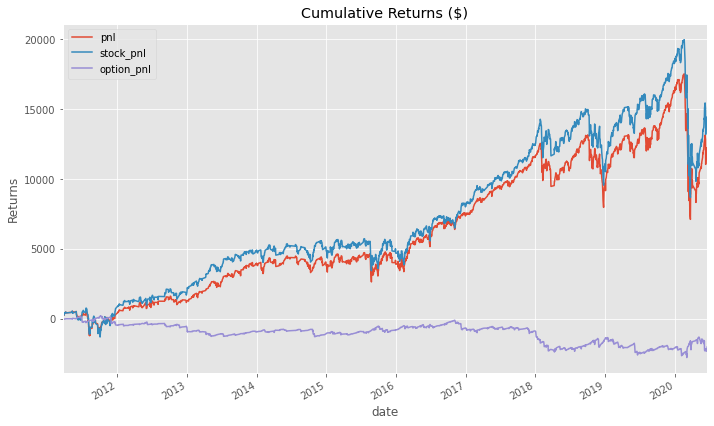

In [20]:
plot_cumulative_returns(df[[PNL, STOCK_PNL, OPTION_PNL]], notional=True)

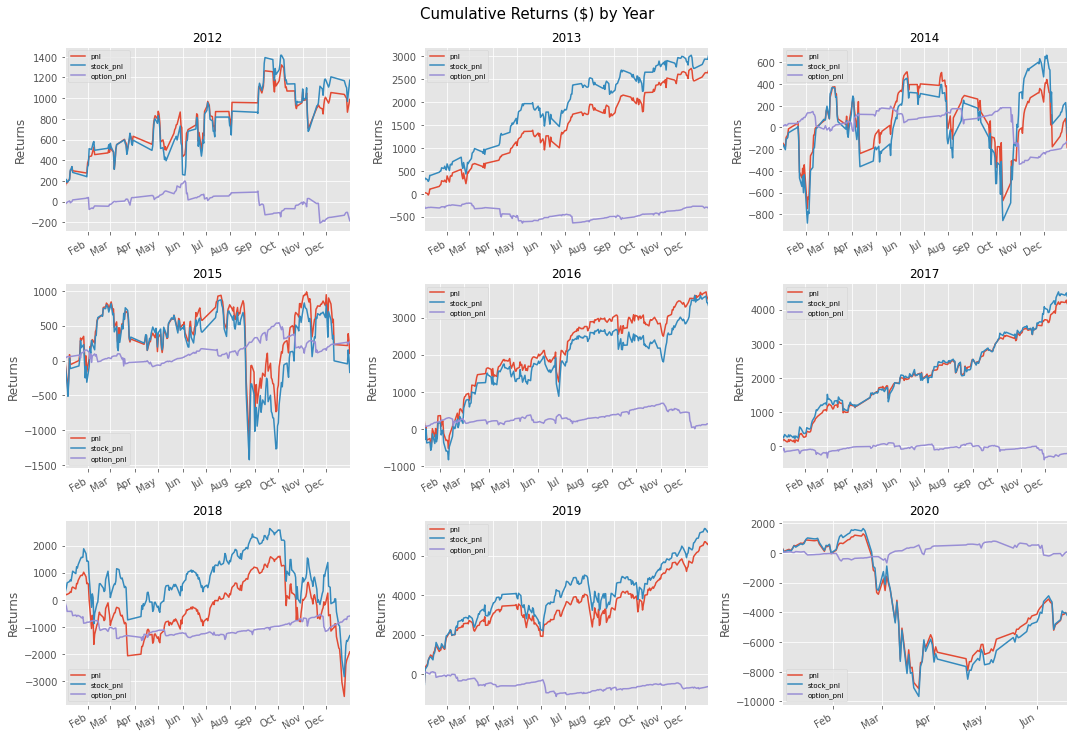

In [21]:
plot_cumulative_returns_by_year(df[[PNL, STOCK_PNL, OPTION_PNL]], notional=True)

In [26]:
strategy.yearly_stats(df[PNL])

,Sharpe,Sortino,Skew,Kurtosis,Win,Max,Min,Return,Count
Year,,,,,,,,,
2011,0.2395,0.2789,-0.7801,2.3063,0.5878,437.3554,-613.1965,307.97,131.0
2012,1.2838,1.7228,-0.3250,1.5030,0.5676,235.9221,-279.4688,988.16,148.0
2013,2.8579,4.1217,-0.1921,1.1632,0.6230,309.3779,-232.2188,2692.80,183.0
2014,-0.1527,-0.1736,-0.8896,1.5024,0.6199,293.5030,-343.1030,-185.02,171.0
2015,0.0454,0.0590,-0.3639,2.9856,0.5364,648.9354,-706.1428,101.78,220.0
2016,1.7356,2.1734,-0.4267,2.6682,0.5909,425.0276,-528.1999,3460.30,242.0
2017,3.4344,3.7972,-0.9224,4.4153,0.6624,249.3096,-362.0900,4177.43,237.0
2018,-0.5137,-0.5511,-0.8391,4.8829,0.5744,1172.1419,-1054.2040,-1920.17,242.0
2019,2.1621,2.4538,-0.8486,3.5321,0.6584,795.6075,-819.0682,6638.22,243.0


In [27]:
strategy.yearly_stats(df[STOCK_PNL])

,Sharpe,Sortino,Skew,Kurtosis,Win,Max,Min,Return,Count
Year,,,,,,,,,
2011,0.4961,0.6548,-0.4705,1.1950,0.5267,435.3554,-652.1965,733.97,131.0
2012,1.2863,1.9519,0.0367,1.0045,0.5479,281.9221,-280.4688,1173.16,148.0
2013,2.7696,4.4417,-0.0568,0.5931,0.5801,314.7568,-249.2188,3015.80,183.0
2014,-0.0419,-0.0524,-0.6195,0.9358,0.5848,336.2961,-352.7802,-56.02,171.0
2015,-0.0692,-0.0985,-0.2288,2.0289,0.4682,650.9354,-754.1428,-170.22,220.0
2016,1.4426,1.9037,-0.4571,2.5220,0.5560,427.6291,-700.1999,3320.30,242.0
2017,3.0169,3.9929,-0.4677,2.8176,0.5720,309.5230,-400.0900,4389.43,237.0
2018,-0.3227,-0.3832,-0.6313,3.1800,0.5333,1150.1419,-1098.2040,-1322.17,242.0
2019,2.1380,2.6056,-0.7605,2.6847,0.5967,794.6075,-862.7747,7263.22,243.0


In [28]:
strategy.yearly_stats(df[OPTION_PNL])

,Sharpe,Sortino,Skew,Kurtosis,Win,Max,Min,Return,Count
Year,,,,,,,,,
2011,-0.9752,-0.7810,-3.0458,16.6725,0.6667,111.0,-365.0,-426.0,131.0
2012,-0.6684,-0.4988,-2.7960,13.0639,0.6870,79.0,-191.0,-185.0,148.0
2013,-0.8543,-0.6031,-5.0031,39.5553,0.6522,66.0,-302.0,-323.0,183.0
2014,-0.4030,-0.3116,-2.5201,13.9386,0.6467,120.0,-180.0,-129.0,171.0
2015,0.5500,0.4910,-1.2743,5.1176,0.7214,109.0,-156.0,272.0,220.0
2016,0.2456,0.2300,-1.2022,8.4593,0.6696,172.0,-215.0,140.0,242.0
2017,-0.4140,-0.3439,-1.6207,7.6546,0.7083,147.0,-181.0,-212.0,237.0
2018,-0.6031,-0.5063,-2.0547,10.1836,0.6651,198.0,-379.0,-598.0,242.0
2019,-0.8305,-0.6930,-2.0252,6.8169,0.6756,125.0,-267.0,-625.0,243.0


### Orats' Stock Price vs Yahoo

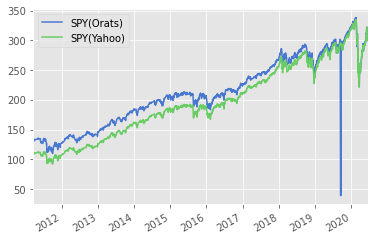

In [55]:
pd.concat([df[STOCK_PRICE], stock], axis=1, keys=['SPY(Orats)', 'SPY(Yahoo)']).dropna().plot()

## Vertical Spread Example

In [40]:
df = strategy.vertical_spread(put, long_delta=0.25, short_delta=0.35, dte=10)

[2020-09-08 23:25:56.163] [ERROR] [option_strategy:check_dup:52] Find duplicated index. Please check the data source:
DatetimeIndex(['2020-04-06', '2020-04-07', '2020-04-07', '2020-04-07',
               '2020-04-08', '2020-04-08', '2020-04-08', '2020-04-09',
               '2020-04-09', '2020-04-09', '2020-05-04', '2020-05-05',
               '2020-05-05', '2020-05-05', '2020-05-06', '2020-05-06',
               '2020-05-06', '2020-05-07', '2020-05-07', '2020-05-07',
               '2020-05-08', '2020-05-08', '2020-05-08'],
              dtype='datetime64[ns]', name='date', freq=None)


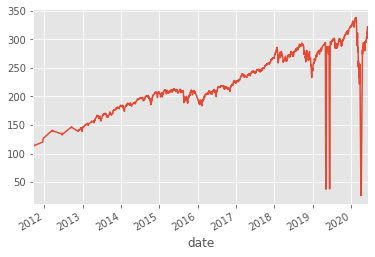

In [30]:
df[STOCK_PRICE].plot()

### Data Derp. Dedup is required

In [31]:
df = strategy.dedup(df)

In [33]:
df.tail()

,date_enter,date_exit,strike_long,expiration,delta_long,dte_long,price_enter_long,price_long,price_prev_long,stock_price,pnl_long,strike_short,delta_short,dte_short,price_enter_short,price_short,price_prev_short,pnl_short,pnl
date,,,,,,,,,,,,,,,,,,,
2020-06-08,2020-06-05,2020-06-12,309.0,2020-06-19,-0.250673,10.0,2.41,1.59,2.41,322.35,-82.0,44.0,-0.354795,10.0,0.56,0.38,0.56,18.0,-64.0
2020-06-09,2020-06-05,2020-06-12,309.0,2020-06-19,-0.250673,10.0,2.41,1.70,1.59,321.43,-71.0,44.0,-0.354795,10.0,0.56,0.30,0.38,26.0,-45.0
2020-06-10,2020-06-05,2020-06-12,309.0,2020-06-19,-0.250673,10.0,2.41,1.92,1.70,319.89,-49.0,44.0,-0.354795,10.0,0.56,0.25,0.30,31.0,-18.0
2020-06-11,2020-06-05,2020-06-12,309.0,2020-06-19,-0.250673,10.0,2.41,11.16,1.92,302.10,875.0,44.0,-0.354795,10.0,0.56,1.44,0.25,-88.0,787.0
2020-06-12,2020-06-05,2020-06-12,309.0,2020-06-19,-0.250673,10.0,2.41,9.40,11.16,303.33,699.0,44.0,-0.354795,10.0,0.56,1.27,1.44,-71.0,628.0


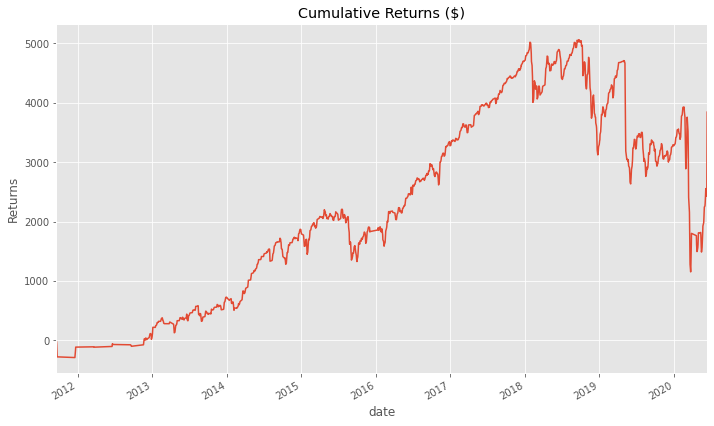

In [34]:
plot_cumulative_returns(df[PNL], notional=True)

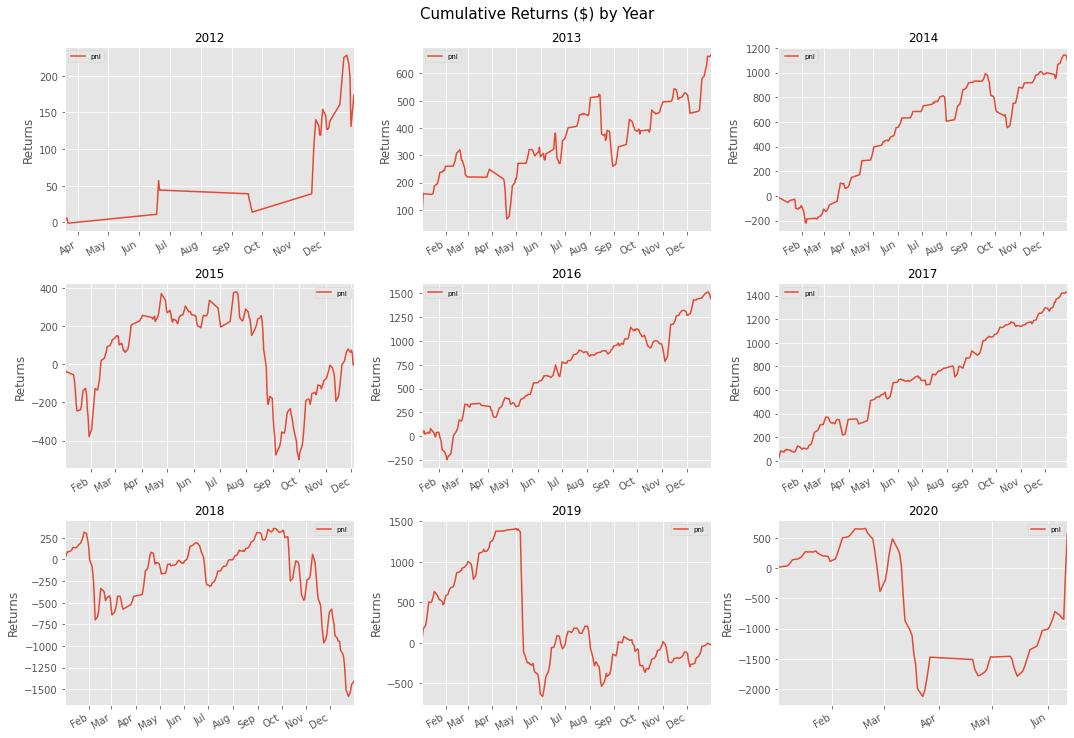

In [38]:
plot_cumulative_returns_by_year(df[PNL], notional=True)

In [35]:
strategy.yearly_stats(df[PNL])

,Sharpe,Sortino,Skew,Kurtosis,Win,Max,Min,Return,Count
Year,,,,,,,,,
2011,-3.1500,-4.2548,-0.4322,-1.1767,0.4000,54.0,-103.0,-114.0,10.0
2012,3.6140,4.5731,-0.7854,2.6856,0.5833,43.0,-66.0,174.0,39.0
2013,2.9441,3.4342,-0.7333,1.9477,0.6628,54.0,-75.0,667.0,177.0
2014,3.9473,3.8891,-1.5181,4.1474,0.7278,54.0,-115.0,1101.0,182.0
2015,0.0087,0.0107,-0.9812,1.3971,0.5789,69.0,-143.0,4.0,209.0
2016,3.6648,5.8538,0.1001,1.3215,0.6061,93.0,-85.0,1445.0,237.0
2017,6.3468,8.6323,-0.3123,1.3006,0.7017,46.0,-49.0,1430.0,241.0
2018,-1.6170,-1.7534,-1.1958,1.6736,0.5983,97.0,-224.0,-1409.0,241.0
2019,-0.0227,-0.0189,-3.5310,19.3380,0.6349,118.0,-432.0,-22.0,242.0


## Calendar Spread Example

In [41]:
df = strategy.calendar_spread(put, delta=0.2, long_dte=5, short_dte=10)

In [42]:
df.tail()

,date_enter,date_exit,strike,expiration_long,delta_long,dte_long,price_enter_long,price_long,price_prev_long,stock_price,pnl_long,expiration_short,delta_short,dte_short,price_enter_short,price_short,price_prev_short,pnl_short,pnl
date,,,,,,,,,,,,,,,,,,,
2020-06-01,2020-05-29,2020-06-05,293.0,2020-06-05,-0.164984,5.0,1.05,0.47,1.05,305.65,-58.0,2020-06-12,-0.237113,10.0,2.32,1.77,2.32,55.0,-3.0
2020-06-02,2020-05-29,2020-06-05,293.0,2020-06-05,-0.164984,5.0,1.05,0.17,0.47,306.60,-88.0,2020-06-12,-0.237113,10.0,2.32,1.33,1.77,99.0,11.0
2020-06-03,2020-05-29,2020-06-05,293.0,2020-06-05,-0.164984,5.0,1.05,0.03,0.17,312.74,-102.0,2020-06-12,-0.237113,10.0,2.32,0.37,1.33,195.0,93.0
2020-06-04,2020-05-29,2020-06-05,293.0,2020-06-05,-0.164984,5.0,1.05,0.00,0.03,310.15,-105.0,2020-06-12,-0.237113,10.0,2.32,0.63,0.37,169.0,64.0
2020-06-05,2020-05-29,2020-06-05,293.0,2020-06-05,-0.164984,5.0,1.05,0.00,0.00,318.64,-105.0,2020-06-12,-0.237113,10.0,2.32,0.03,0.63,229.0,124.0


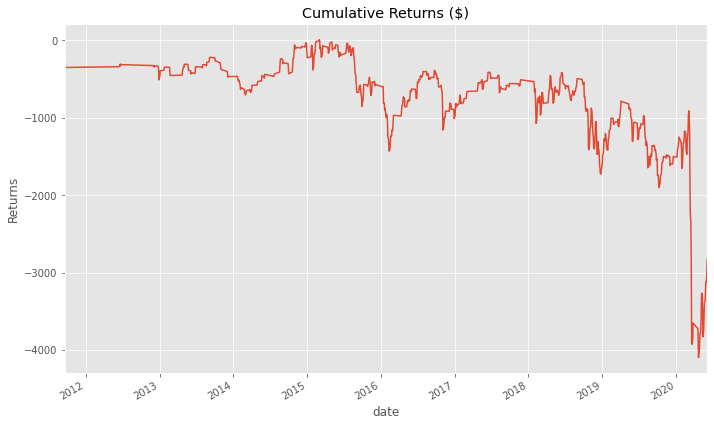

In [44]:
plot_cumulative_returns(df[PNL], notional=True)

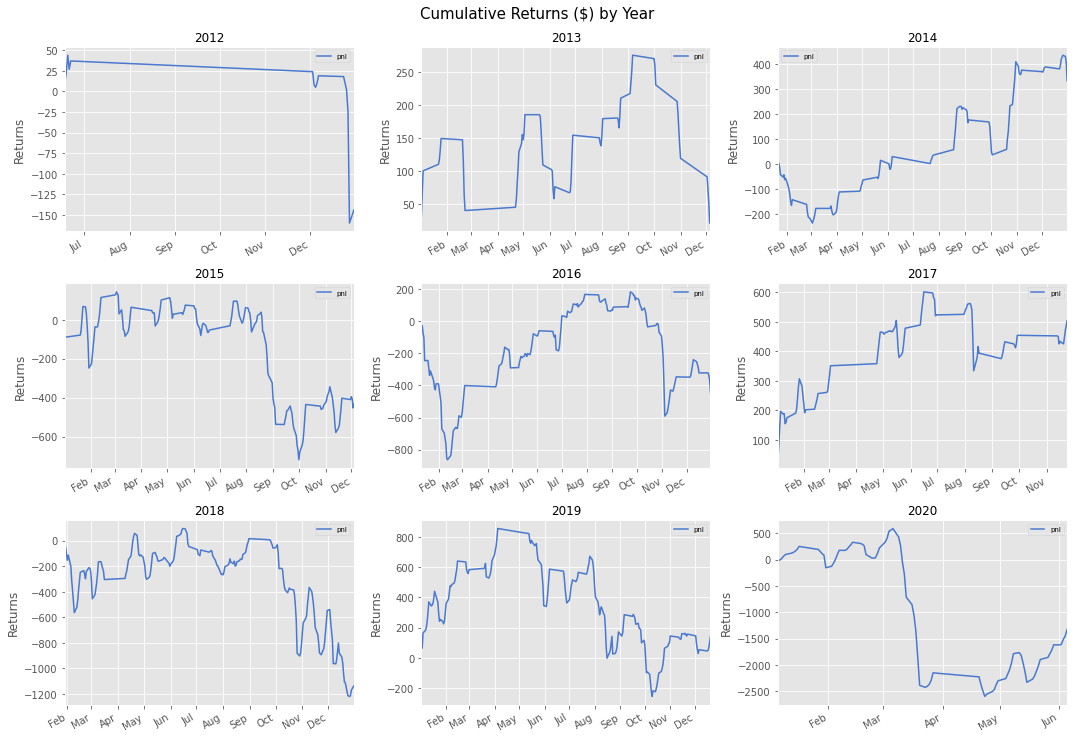

In [45]:
plot_cumulative_returns(df[PNL], notional=True, yearly=True)

In [47]:
strategy.yearly_stats(df[PNL])

,Sharpe,Sortino,Skew,Kurtosis,Win,Max,Min,Return,Count
Year,,,,,,,,,
2011,-40.4411,-40.4411,0.0421,-1.7105,NaN,-41.0,-100.0,-349.0,5.0
2012,-4.0602,-3.4784,-2.6505,6.6170,0.4667,21.0,-135.0,-144.0,15.0
2013,0.3107,0.5264,-0.1435,-0.7918,0.4844,37.0,-51.0,26.0,65.0
2014,2.2244,3.4110,-0.2446,0.4941,0.5800,57.0,-74.0,334.0,100.0
2015,-1.1971,-1.5923,-0.6777,0.3133,0.5226,65.0,-132.0,-434.0,155.0
2016,-1.0515,-1.1029,-1.8623,6.2606,0.5000,73.0,-202.0,-444.0,170.0
2017,3.0727,3.0766,-1.5478,4.7219,0.6771,58.0,-116.0,503.0,98.0
2018,-1.7548,-2.1794,-0.9403,2.3073,0.4974,95.0,-257.0,-1136.0,195.0
2019,0.3021,0.4026,-0.6594,0.3187,0.5575,100.0,-133.0,143.0,174.0


### ... which means if you reverse this

In [48]:
df = strategy.calendar_spread(put, delta=0.2, long_dte=10, short_dte=5)

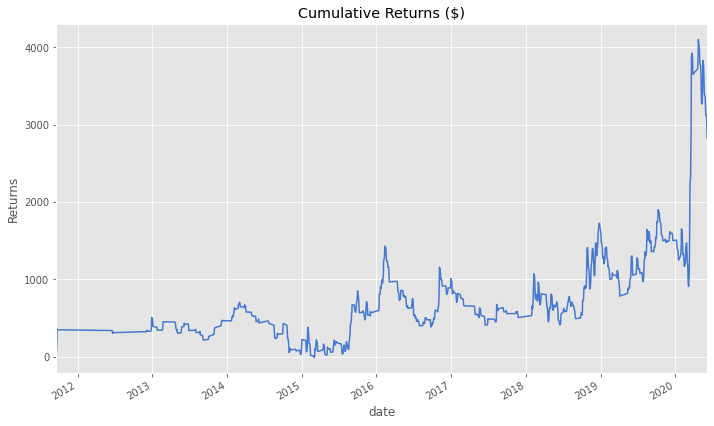

In [49]:
plot_cumulative_returns(df[PNL], notional=True)

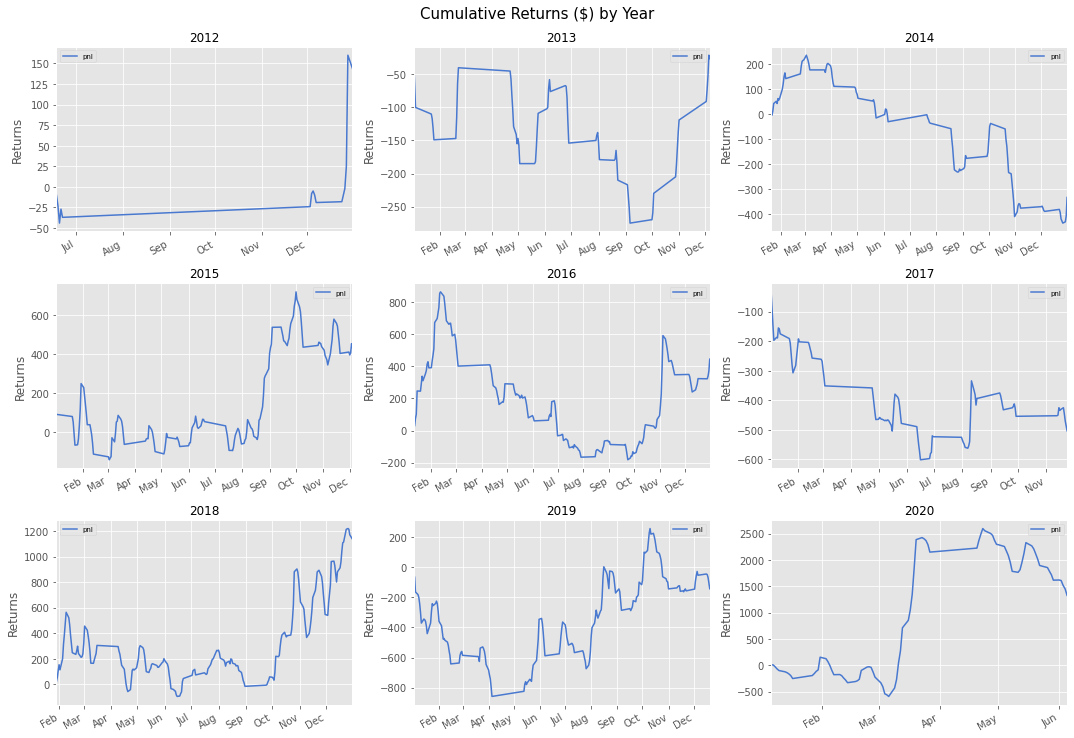

In [50]:
plot_cumulative_returns(df[PNL], notional=True, yearly=True)

In [51]:
strategy.yearly_stats(df[PNL])

,Sharpe,Sortino,Skew,Kurtosis,Win,Max,Min,Return,Count
Year,,,,,,,,,
2011,40.4411,NaN,-0.0421,-1.7105,1.0000,100.0,41.0,349.0,5.0
2012,4.0602,29.1491,2.6505,6.6170,0.5333,135.0,-21.0,144.0,15.0
2013,-0.3107,-0.6297,0.1435,-0.7918,0.5156,51.0,-37.0,-26.0,65.0
2014,-2.2244,-3.5731,0.2446,0.4941,0.4200,74.0,-57.0,-334.0,100.0
2015,1.1971,2.7417,0.6777,0.3133,0.4774,132.0,-65.0,434.0,155.0
2016,1.0515,2.5156,1.8623,6.2606,0.5000,202.0,-73.0,444.0,170.0
2017,-3.0727,-6.1194,1.5478,4.7219,0.3229,116.0,-58.0,-503.0,98.0
2018,1.7548,3.6403,0.9403,2.3073,0.5026,257.0,-95.0,1136.0,195.0
2019,-0.3021,-0.6360,0.6594,0.3187,0.4425,133.0,-100.0,-143.0,174.0
